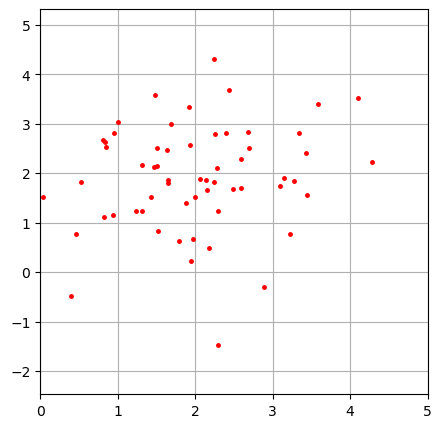

In [20]:
using PyPlot, Random

Random.seed!(0)

x = 2 .+ randn(2, 60)

figure(figsize=(5,5))
plot(x[1,1:end],x[2,1:end],"r.", markersize=5)
axis([0,5,minimum(x)-1,maximum(x)+1])
grid("on")